In [40]:
%matplotlib inline

import os
import subprocess
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

BASE_DIR = os.path.dirname(os.path.realpath('.'))

np.random.seed(42)

In [41]:
def get_titanic_dataset():
    """
    To use this function, you must create a kaggle API token
    https://github.com/Kaggle/kaggle-api
    """
    dataset_dir = os.path.join(BASE_DIR, 'datasets', 'titanic')
    train_path = os.path.join(dataset_dir, 'train.csv')
    test_path = os.path.join(dataset_dir, 'test.csv')
    
    data_exists = os.path.isfile(train_path) and os.path.isfile(test_path)
    if not data_exists:
        os.makedirs(dataset_dir, exist_ok=True)
        subprocess.check_call(['kaggle', 'competitions', 'download', '-c', 'titanic', '-p', dataset_dir])
    
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    
    X_train = df_train.drop(columns=['Survived'])
    y_train = df_train['Survived']
    X_test = df_test
    
    return X_train, y_train, X_test

In [42]:
X_train, y_train, X_test = get_titanic_dataset()

In [43]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
X_train['Ticket'].value_counts().head()

CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
Name: Ticket, dtype: int64

In [56]:
X_train['Cabin'].value_counts().head()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
Name: Cabin, dtype: int64

In [53]:
X_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
X_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [60]:
X_train[X_train['Pclass'] == 3]['Cabin'].value_counts(dropna=False)

NaN      479
G6         4
E121       2
F G73      2
F E69      1
F G63      1
E10        1
F38        1
Name: Cabin, dtype: int64

In [61]:
X_train[X_train['Pclass'] == 2]['Cabin'].value_counts(dropna=False)

NaN     168
D         3
F2        3
E101      3
F33       3
F4        2
E77       1
D56       1
Name: Cabin, dtype: int64

In [62]:
X_train[X_train['Pclass'] == 1]['Cabin'].value_counts(dropna=False)

NaN            40
C23 C25 C27     4
B96 B98         4
C22 C26         3
B77             2
C92             2
C2              2
B58 B60         2
B18             2
D33             2
B35             2
E25             2
C123            2
C68             2
B28             2
E67             2
E24             2
B49             2
E44             2
D36             2
D26             2
B51 B53 B55     2
B20             2
C83             2
C124            2
D20             2
D17             2
C78             2
C125            2
B5              2
               ..
D46             1
C32             1
D11             1
A32             1
E17             1
B82 B84         1
D21             1
D50             1
C91             1
B86             1
D7              1
B41             1
B37             1
D10 D12         1
E31             1
E40             1
A31             1
A19             1
E50             1
T               1
E58             1
D6              1
B73             1
B69             1
C110      

In [45]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

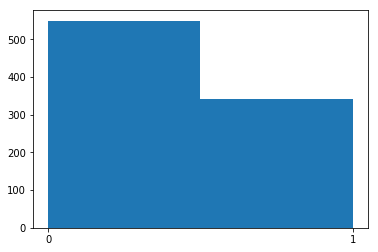

In [46]:
plt.hist(y_train, bins=2)
plt.xticks([0, 1])
plt.show()

In [ ]:
X_train_prep = X_train.drop(columns=['Name'])

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

/Users/henryehly/src/handson-ml/.venv-3.6.8/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


ValueError: could not convert string to float: 'Q'